# Gender-recognition-from-voice-using-machine-learning

In [1]:
## If only Use Google Colab ##
from google.colab import files
uploaded = files.upload()

Saving voice.csv to voice.csv


## Import libraries

In [2]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn import manifold, datasets
from sklearn.manifold import SpectralEmbedding
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## To choose DR Method, Uncomment the selection

#### Here parameters are only optimized for LTSA method with KNN classifier

In [3]:
#DR = 'LE'
#DR = 'HLLE'
DR = 'LTSA'
#DR = None

## To choose Classification Method, Uncomment the selection

In [4]:
Classification_method = 'KNN'
#Classification_method = 'DT'
#Classification_method = 'SVM'
#Classification_method = None

## To choose the name of the Output file

In [5]:
method = str(DR) + str('_') + str(Classification_method) + str('_')

## Read the data file

In [6]:
name_of_file = 'voice.csv'

# df = pd.read_excel (name_of_file) # If file is in xlsx format
df = pd.read_csv(name_of_file)

## To remove column with high co-relation (95% Here)

In [7]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [8]:
k = df.drop(cols_to_drop, axis=1)
df = k
k = 1

## To shuffle the data

In [9]:
df_1 = shuffle(df)
df = df_1

## separate data and class

In [10]:
y = df.iloc[:, -1]
x = df.drop(df.columns[-1], axis=1)

k_temp = x

## Min-Max Scaling of the data (Scale the values between 0 & 1)

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = x_scaled

## To print the size of X and Y (class)

In [12]:
print(x.shape)
print(y.shape)

(3168, 17)
(3168,)


In [13]:
x

array([[0.76091244, 0.15325644, 0.77941766, ..., 0.04086021, 0.4799857 ,
        0.13064957],
       [0.6667827 , 0.48739438, 0.69966962, ..., 0.04086021, 0.43924232,
        0.096554  ],
       [0.88442862, 0.1955507 , 0.89020292, ..., 0.04086021, 0.43173695,
        0.13803323],
       ...,
       [0.60633709, 0.4181212 , 0.59524278, ..., 0.00645161, 0.31272337,
        0.06260752],
       [0.61365133, 0.38256757, 0.70332124, ..., 0.00645161, 0.02859185,
        0.288913  ],
       [0.56507279, 0.48320796, 0.65931314, ..., 0.        , 0.03515904,
        0.6248202 ]])

In [14]:
y

2546    female
2185    female
2288    female
3139    female
1164      male
         ...  
1388      male
1376      male
70        male
596       male
719       male
Name: label, Length: 3168, dtype: object

In [15]:
main_accuracy = []

q_component = 0

## Loop to calculate optimised number of dimension using q_component
## Once the optimum dimension is found, Use N as a starting and N+1 as the ending value in for loop

In [16]:
for n_component in range(16, 17):

    q_component += 1
    print('Num of Component :: ', n_component)

    # LE - Locally Linear Embedding

    if (DR == 'LE'):
        clf = SpectralEmbedding(n_components=n_component, affinity='rbf', n_neighbors=300)
        X_le = clf.fit_transform(k_temp)
        x = X_le
        # print(x.shape)

    # HLLE - Hessian-based Locally Linear Embedding

    if (DR == 'HLLE'):
        hlle = manifold.LocallyLinearEmbedding(n_neighbors=300, n_components=n_component, eigen_solver='dense', method='hessian')
        X_hlle = hlle.fit_transform(k_temp)
        x = X_hlle
        # print(x.shape)

    # LTSA - Local Tangent Space Alignment

    if (DR == 'LTSA'):
        clf = manifold.LocallyLinearEmbedding(n_neighbors=300, n_components=n_component, eigen_solver='dense', method='ltsa')
        X_ltsa = clf.fit_transform(k_temp)
        x = X_ltsa
        # print(x.shape)

    # Train - Test Split
    # Here data is split in 80% training and 20% testing set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    # KNN - K NEAREST NEIGHBOUR

    if (Classification_method == 'KNN'):
        clf = KNeighborsClassifier(n_neighbors=3, algorithm='auto', leaf_size=3)
        nbc = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Decision Tree

    if (Classification_method == 'DT'):
        clf = DecisionTreeClassifier(criterion='entropy', random_state=1000)
        dt = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)  # X_validation)

    # SVM - Support Vector Machine

    if (Classification_method == 'SVM'):
        clf = svm.SVC(kernel='rbf', decision_function_shape='ovr', gamma='scale', C=100)
        svm = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)  # X_validation)

    # To us K-fold Cross-validation
    # Here K=10
    num_validations = 10

    accuracy = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = num_validations)
    main_accuracy.append(statistics.mean(accuracy))

Num of Component ::  16


## Print the overall accuracy

In [17]:
print(main_accuracy)

[0.9778889545921384]


## To prepare Confusion Matrix

In [18]:
conf_mat_print = metrics.confusion_matrix(y_test, y_pred)

In [19]:
conf_mat_print

array([[315,   7],
       [  4, 308]])

## To draw Confusion Matrix

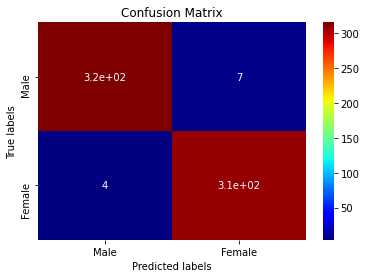

In [20]:
ax= plt.subplot()
sns.heatmap(conf_mat_print, annot=True, ax = ax, cmap='jet'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Male', 'Female']); 
ax.yaxis.set_ticklabels(['Male', 'Female']);

## Setting rest of the parameters to plot the Confusion matrix

In [21]:
name_out_graph = 'Final_Res' + '.jpg'
plt.rcParams.update({'font.size': 5})
f = plt.figure(1)
plt.savefig(name_out_graph, dpi=1000, fontsize=5, bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>